In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [3]:

ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [4]:

total_x=ds_total_x.to_numpy(dtype='float32')
total_y=ds_total_y.to_numpy(dtype='float32')
     

In [5]:
train_x,test_x,train_y,test_y=train_test_split(total_x,total_y,test_size=0.15,random_state=False)


In [6]:

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [7]:
num_classes = len(np.unique(train_y))

In [8]:
print(num_classes)


31


In [10]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
#     conv1 = keras.layers.AveragePooling1D(pool_size=0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    conv4 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)
    conv4 = keras.layers.AveragePooling1D(pool_size=2)(conv4)

    conv5 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    conv5 = keras.layers.ReLU()(conv5)

    conv6 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv5)
    conv6 = keras.layers.BatchNormalization()(conv6)
    conv6 = keras.layers.ReLU()(conv6)

    conv7 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv6)
    conv7 = keras.layers.BatchNormalization()(conv7)
    conv7 = keras.layers.ReLU()(conv7)

    # conv8 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv7)
    # conv8 = keras.layers.BatchNormalization()(conv8)
    # conv8 = keras.layers.ReLU()(conv8)

    # conv9 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv8)
    # conv9 = keras.layers.BatchNormalization()(conv9)
    # conv9 = keras.layers.ReLU()(conv9)

    gap =  keras.layers.AveragePooling1D(pool_size=2)(conv7)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_x.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)


In [11]:
epochs = 300
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.15,
    verbose=1,
)

Epoch 1/300
3275/3275 [==============================] - 24s 7ms/step - loss: 0.9379 - sparse_categorical_accuracy: 0.6385 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.7442
Epoch 2/300
3275/3275 [==============================] - 27s 8ms/step - loss: 0.6821 - sparse_categorical_accuracy: 0.7217 - val_loss: 0.7607 - val_sparse_categorical_accuracy: 0.6771
Epoch 3/300
3275/3275 [==============================] - 30s 9ms/step - loss: 0.6044 - sparse_categorical_accuracy: 0.7518 - val_loss: 0.5989 - val_sparse_categorical_accuracy: 0.7497
Epoch 4/300
3275/3275 [==============================] - 27s 8ms/step - loss: 0.5579 - sparse_categorical_accuracy: 0.7701 - val_loss: 0.4875 - val_sparse_categorical_accuracy: 0.7989
Epoch 5/300
3275/3275 [==============================] - 28s 8ms/step - loss: 0.5291 - sparse_categorical_accuracy: 0.7813 - val_loss: 0.5861 - val_sparse_categorical_accuracy: 0.7557
Epoch 6/300
3275/3275 [==============================] - 29s 9ms/step - loss: 0.

3275/3275 [==============================] - 33s 10ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.3573 - val_sparse_categorical_accuracy: 0.8515
Epoch 46/300
3275/3275 [==============================] - 32s 10ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.8516 - val_loss: 0.3437 - val_sparse_categorical_accuracy: 0.8587
Epoch 47/300
3275/3275 [==============================] - 29s 9ms/step - loss: 0.3587 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.3900 - val_sparse_categorical_accuracy: 0.8375
Epoch 48/300
3275/3275 [==============================] - 28s 9ms/step - loss: 0.3578 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.3273 - val_sparse_categorical_accuracy: 0.8651
Epoch 49/300
3275/3275 [==============================] - 28s 9ms/step - loss: 0.3575 - sparse_categorical_accuracy: 0.8527 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8500
Epoch 50/300
3275/3275 [==============================] - 28s 9ms/step - loss: 0.3571 

3275/3275 [==============================] - 26s 8ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8722 - val_loss: 0.3271 - val_sparse_categorical_accuracy: 0.8715
Epoch 90/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3107 - sparse_categorical_accuracy: 0.8727 - val_loss: 0.3125 - val_sparse_categorical_accuracy: 0.8729
Epoch 91/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.8834
Epoch 92/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.8721 - val_loss: 0.2978 - val_sparse_categorical_accuracy: 0.8804
Epoch 93/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3091 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.3336 - val_sparse_categorical_accuracy: 0.8614
Epoch 94/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3095 - 

3275/3275 [==============================] - 27s 8ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3125 - val_sparse_categorical_accuracy: 0.8738
Epoch 134/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.8746 - val_loss: 0.3100 - val_sparse_categorical_accuracy: 0.8757
Epoch 135/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3029 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.3040 - val_sparse_categorical_accuracy: 0.8754
Epoch 136/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3145 - val_sparse_categorical_accuracy: 0.8701
Epoch 137/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.3032 - sparse_categorical_accuracy: 0.8748 - val_loss: 0.2985 - val_sparse_categorical_accuracy: 0.8789
Epoch 138/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.30

3275/3275 [==============================] - 27s 8ms/step - loss: 0.2866 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.2898 - val_sparse_categorical_accuracy: 0.8834
Epoch 178/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.2861 - sparse_categorical_accuracy: 0.8824 - val_loss: 0.2878 - val_sparse_categorical_accuracy: 0.8830
Epoch 179/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.2866 - sparse_categorical_accuracy: 0.8821 - val_loss: 0.2902 - val_sparse_categorical_accuracy: 0.8829
Epoch 180/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.2804 - val_sparse_categorical_accuracy: 0.8860
Epoch 181/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.2868 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.2911 - val_sparse_categorical_accuracy: 0.8826
Epoch 182/300
3275/3275 [==============================] - 26s 8ms/step - loss: 0.28

3275/3275 [==============================] - 48s 15ms/step - loss: 0.2842 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.2876 - val_sparse_categorical_accuracy: 0.8842
Epoch 222/300
3275/3275 [==============================] - 51s 16ms/step - loss: 0.2844 - sparse_categorical_accuracy: 0.8825 - val_loss: 0.2813 - val_sparse_categorical_accuracy: 0.8869
Epoch 223/300
3275/3275 [==============================] - 52s 16ms/step - loss: 0.2849 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.2858 - val_sparse_categorical_accuracy: 0.8845
Epoch 224/300
3275/3275 [==============================] - 36s 11ms/step - loss: 0.2838 - sparse_categorical_accuracy: 0.8834 - val_loss: 0.2883 - val_sparse_categorical_accuracy: 0.8849
Epoch 225/300
3275/3275 [==============================] - 24s 7ms/step - loss: 0.2843 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.2901 - val_sparse_categorical_accuracy: 0.8831
Epoch 226/300
3275/3275 [==============================] - 27s 8ms/step - loss: 

3275/3275 [==============================] - 29s 9ms/step - loss: 0.2762 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.2825 - val_sparse_categorical_accuracy: 0.8859
Epoch 266/300
3275/3275 [==============================] - 28s 9ms/step - loss: 0.2755 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.2794 - val_sparse_categorical_accuracy: 0.8874
Epoch 267/300
3275/3275 [==============================] - 29s 9ms/step - loss: 0.2763 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2841 - val_sparse_categorical_accuracy: 0.8848
Epoch 268/300
3275/3275 [==============================] - 28s 9ms/step - loss: 0.2754 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2760 - val_sparse_categorical_accuracy: 0.8899
Epoch 269/300
3275/3275 [==============================] - 29s 9ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.2804 - val_sparse_categorical_accuracy: 0.8868
Epoch 270/300
3275/3275 [==============================] - 29s 9ms/step - loss: 0.27

In [13]:
model = keras.models.load_model('best_model.h5')

test_loss, test_acc = model.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)
     

1360/1360 [==============================] - 3s 2ms/step - loss: 0.2710 - sparse_categorical_accuracy: 0.8908
Test accuracy 0.890788733959198
Test loss 0.27103665471076965


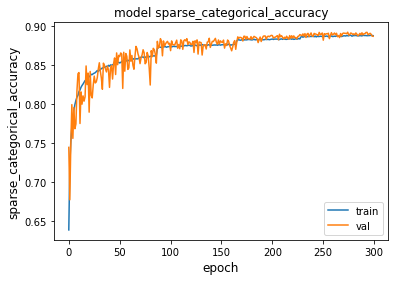

In [15]:

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

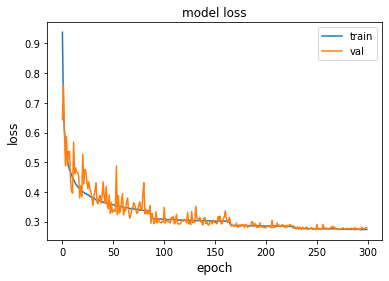

In [14]:
metric1 = "loss"
plt.figure()
plt.plot(history.history[metric1])
plt.plot(history.history["val_" + metric1])
plt.title("model " + metric1)
plt.ylabel(metric1, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [16]:
y_pred=model.predict(test_x)
res=[]
for i in y_pred:
  res.append(np.argmax(i))
print(res)
     

[11, 6, 7, 24, 4, 12, 15, 18, 14, 15, 14, 5, 16, 18, 13, 16, 18, 27, 5, 9, 6, 7, 26, 18, 28, 26, 30, 11, 11, 25, 11, 30, 18, 27, 29, 18, 7, 15, 15, 11, 28, 12, 30, 13, 12, 11, 13, 18, 27, 11, 26, 13, 30, 17, 25, 25, 16, 13, 13, 29, 15, 26, 20, 22, 16, 16, 28, 25, 6, 21, 27, 6, 7, 17, 16, 13, 24, 26, 18, 14, 14, 9, 16, 18, 6, 12, 29, 25, 13, 28, 7, 22, 26, 30, 6, 13, 30, 15, 26, 20, 18, 12, 7, 11, 12, 30, 28, 25, 8, 6, 22, 18, 23, 26, 26, 29, 18, 25, 7, 7, 30, 16, 6, 14, 28, 28, 25, 17, 13, 6, 29, 6, 16, 4, 12, 11, 25, 6, 26, 9, 3, 30, 25, 25, 30, 13, 29, 6, 28, 17, 24, 6, 14, 17, 12, 16, 30, 25, 29, 29, 25, 12, 6, 17, 10, 25, 27, 26, 25, 3, 30, 14, 26, 26, 26, 30, 18, 26, 18, 13, 25, 17, 6, 18, 14, 26, 28, 14, 12, 30, 11, 21, 16, 17, 9, 18, 6, 26, 18, 17, 6, 12, 11, 13, 23, 13, 29, 30, 16, 7, 18, 24, 7, 28, 25, 24, 17, 23, 26, 7, 10, 29, 14, 25, 25, 18, 12, 6, 6, 18, 17, 17, 28, 14, 6, 29, 22, 26, 30, 14, 28, 14, 21, 11, 15, 4, 11, 25, 20, 11, 6, 30, 14, 25, 26, 12, 26, 4, 13, 30, 25, 

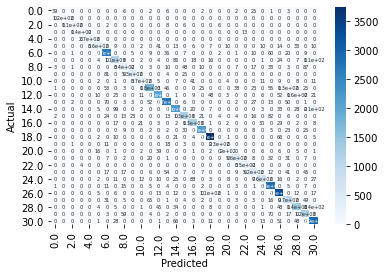

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, res)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [18]:

confusion_mat=np.array(data)
as1=pd.DataFrame(confusion_mat)
as1.to_excel('pool.xlsx')